In [1]:
import pandas as pd
import numpy as np

from itertools import chain

import matplotlib.pyplot as plt

from tqdm import tqdm
tqdm.pandas()

%matplotlib inline

# THE DATASET

The `tile_placements.csv` file is the one provided on [reddit](https://www.reddit.com/r/redditdata/comments/6640ru/place_datasets_april_fools_2017/).

It contains all the clicks with their timestamp, the anonymized user, the x and y coordinates in the canvas grid, and the color (0 to 15).

In [2]:
df = pd.read_csv("data/tile_placements.csv")
df

,ts,user,x_coordinate,y_coordinate,color
0,1491167838000,c2Md9m4QckH8M+lhNh9btgoiFDk=,326,258,0
1,1491171651000,5KjCuLCk/VTXBIgaszopYecZ3uU=,190,791,0
2,1491105072000,toyjOAoAZMtlGZ3hXm5/LYsi+iA=,1,753,0
3,1491235861000,TGENUMJ6VmaBRr8ae9yP0MWQ66g=,233,931,0
4,1491163179000,usR8PLvN90gdivTbszEqhvPcXI4=,526,663,0
5,1491049593000,PhCeV35qg+Kd4HZH2A8YsmwE65w=,578,327,0
6,1491144746000,h36EHV8mxPdVf6/KSVcVJdQD+3g=,555,330,0
7,1491233125000,Fs34pA4xcfKSvw/c+kS+P31aB+s=,906,95,0
8,1491149990000,JSi4ekmizWOUcjae6TFFCLUGeH8=,862,480,0
9,1491098731000,otYEXzF2K9RLO0VCBSS/bpOcek4=,404,959,0


In [3]:
print("Number of duplicate rows :", df.duplicated().sum())

Number of duplicate rows : 490


In [4]:
# we remove them, considering they are mistakes in the gathering of the clicks in the first place
df.drop_duplicates(inplace=True)

In [5]:
# we order the click in time
df = df.sort_values("ts")

In [6]:
pd.to_datetime(df.ts,unit='ms')

13216722   2017-03-31 00:04:48
15577615   2017-03-31 00:05:28
5985698    2017-03-31 00:06:21
16342824   2017-03-31 00:15:37
5693574    2017-03-31 00:15:49
9251462    2017-03-31 00:16:01
2145079    2017-03-31 00:16:19
966759     2017-03-31 00:16:38
4497938    2017-03-31 00:16:50
13970911   2017-03-31 00:17:06
12804041   2017-03-31 00:17:45
3316652    2017-03-31 00:18:00
6868433    2017-03-31 00:18:14
3523627    2017-03-31 00:19:17
3330332    2017-03-31 00:19:49
13987344   2017-03-31 00:20:01
8052294    2017-03-31 00:20:13
4499222    2017-03-31 00:20:25
12786946   2017-03-31 00:20:38
4515798    2017-03-31 00:20:49
8063475    2017-03-31 00:21:02
16345935   2017-03-31 00:21:14
6871959    2017-03-31 00:21:25
5688462    2017-03-31 00:21:37
11591473   2017-03-31 00:21:49
16326676   2017-03-31 00:22:00
959657     2017-03-31 00:22:14
12802170   2017-03-31 00:22:29
10437120   2017-03-31 00:22:41
15143427   2017-03-31 00:22:56
                   ...        
14325690   2017-04-03 16:58:40
1221925 

In [7]:
conflicting_timestamps = df.shape[0] - df.ts.nunique()
print("Number of conflicting timestamps :", conflicting_timestamps, "(", 100*conflicting_timestamps/df.shape[0], "%)")

Number of conflicting timestamps : 16299638 ( 98.4312904441566 %)


Most of the time stamps are conflicting because they are rounded to the second. There are more than 16 million actions and only 259'200 seconds in 3 days.

In [8]:
print("Number of different users :", df.user.nunique())

Number of different users : 1166924


In [9]:
print("Number of active users (more than 4 clicks) :", (df.groupby("user").size() > 4).sum())

Number of active users (more than 4 clicks) : 492247


The file 'group_export.csv' was compiled by Jérémie Rappaz from the [source code](https://raw.githubusercontent.com/RolandR/place-atlas/master/web/_js/atlas.js) of this [atlas](https://draemm.li/various/place-atlas/). It contains the coordinates of each artwork that could be distinguished in the final canvas.

In [10]:
artworks = pd.read_csv("data/group_export.csv",header=None,names=['x','y','id'])
artworks

,x,y,id
0,390,490,1
1,390,491,1
2,390,492,1
3,390,493,1
4,390,494,1
5,390,495,1
6,390,496,1
7,390,497,1
8,390,498,1
9,390,499,1


In [11]:
df_w_art = pd.merge(df, artworks,  how='left', left_on=['x_coordinate','y_coordinate'], right_on = ['x','y'])

In [12]:
print( 100 * df_w_art.id.isnull().sum() / df_w_art.shape[0], "% of clicks don't belong to a known artwork" )

11.865449046575158 % of clicks don't belong to a known artwork


In [13]:
df_w_art = df_w_art.drop(['x','y'], axis=1).dropna()
df_w_art.id = df_w_art.id.astype(int)
df_w_art = df_w_art.rename(columns={'id': 'artwork'})
df_w_art

,ts,user,x_coordinate,y_coordinate,color,artwork
0,1490918688000,2puPLvQ6X2zTSpfBkHXhxlIVo40=,505,510,1,1122
1,1490918728000,2puPLvQ6X2zTSpfBkHXhxlIVo40=,490,504,1,1122
2,1490918781000,2puPLvQ6X2zTSpfBkHXhxlIVo40=,518,498,0,1122
3,1490919337000,GP2B74SRyrZ3HIflSFoAzM+jS3U=,474,495,11,1122
4,1490919349000,GP2B74SRyrZ3HIflSFoAzM+jS3U=,477,495,11,1122
5,1490919361000,GP2B74SRyrZ3HIflSFoAzM+jS3U=,472,496,11,1122
6,1490919379000,GP2B74SRyrZ3HIflSFoAzM+jS3U=,473,497,11,1122
7,1490919398000,GP2B74SRyrZ3HIflSFoAzM+jS3U=,474,498,11,1122
8,1490919410000,GP2B74SRyrZ3HIflSFoAzM+jS3U=,475,498,11,1122
9,1490919426000,GP2B74SRyrZ3HIflSFoAzM+jS3U=,476,498,11,1122


In [14]:
worked_on = df_w_art.groupby("user").artwork.apply(set) # set of artworks each user participated in
worked_on

user
+++/DjiwyzTQzfai1RGavwwdeF0=       {73, 1066, 1198, 495, 849, 213, 214, 920, 921}
+++9hvbU1X//SlejJp59KbSRc1A=                                                {503}
+++oRgWqj1lB5TeiH4L9knAO22c=                                   {56, 130, 379, 95}
+++puVCRnLGcHlnCeZ4SQbDsuTY=                                          {1122, 371}
+++qNQn+KYTeVhJksRjO3UOtuFQ=                                       {1066, 94, 95}
++/9E7wvd9z2dmTPdzL1lfCxo4A=                                               {1180}
++/EZo8X5/iofnK7mr2VhpFR8S4=                                                 {55}
++/KGWlqH96wS48Q/DQibZ1v89w=                                       {496, 57, 165}
++/bKLDeIz4ocCIk7UAFZvG5GBQ=                                                {378}
++/kXquvnG11CSClr5IVpPftjxg=                                                {311}
++/qlDNL7l4aenV/jBZnWrDz5vQ=                                                {165}
++/rK5dJpOkIsiCHJipB9VBlO4Y=                                                {478}
++/v9ULXzTT

In [15]:
print("We have the list of artworks of " + str(100*len(worked_on)/df.user.nunique()) + "% of users")

We have the list of artworks of 95.26670117334119% of users


In [17]:
colors_used = df_w_art.groupby("user").color.apply(set) # set of colors used by each user
colors_used

user
+++/DjiwyzTQzfai1RGavwwdeF0=                                    {13}
+++9hvbU1X//SlejJp59KbSRc1A=                                     {5}
+++oRgWqj1lB5TeiH4L9knAO22c=                     {0, 3, 4, 5, 8, 10}
+++puVCRnLGcHlnCeZ4SQbDsuTY=                              {0, 13, 5}
+++qNQn+KYTeVhJksRjO3UOtuFQ=                              {0, 4, 13}
++/9E7wvd9z2dmTPdzL1lfCxo4A=                                    {10}
++/EZo8X5/iofnK7mr2VhpFR8S4=                                     {5}
++/KGWlqH96wS48Q/DQibZ1v89w=                                  {5, 6}
++/bKLDeIz4ocCIk7UAFZvG5GBQ=                                     {0}
++/kXquvnG11CSClr5IVpPftjxg=                                     {8}
++/qlDNL7l4aenV/jBZnWrDz5vQ=                                     {0}
++/rK5dJpOkIsiCHJipB9VBlO4Y=                                     {5}
++/v9ULXzTTllkiW/GdCjqOWPQ8=                               {0, 1, 4}
++0FM8OVDxYVKSyl9Nm042ZhdA8=                                     {8}
++0O4GYL01Li1GdeQoWeS1wAJ+c= 

In [18]:
artworks["pixel"] = artworks["x"]+artworks["y"]*1001
artworks

,x,y,id,pixel
0,390,490,1,490880
1,390,491,1,491881
2,390,492,1,492882
3,390,493,1,493883
4,390,494,1,494884
5,390,495,1,495885
6,390,496,1,496886
7,390,497,1,497887
8,390,498,1,498888
9,390,499,1,499889


In [19]:
art_coordinates = artworks.groupby('id').pixel.apply(list)
art_coordinates

id
1       [490880, 491881, 492882, 493883, 494884, 49588...
2       [374698, 375699, 376700, 377701, 378702, 37970...
3       [637640, 638641, 639642, 640643, 641644, 64264...
4       [567928, 567929, 568930, 569931, 570932, 57193...
5       [117691, 118692, 119693, 120694, 121695, 12269...
6       [128739, 129740, 130741, 131742, 132743, 13374...
7       [145756, 146757, 147758, 148759, 149760, 15076...
8       [276978, 277979, 278980, 279981, 280982, 28198...
9       [333051, 334052, 335053, 336054, 337055, 33805...
10      [322982, 323983, 324984, 325985, 326986, 32798...
11      [530844, 531845, 532846, 530845, 531846, 53284...
12      [336465, 335465, 336466, 337467, 338468, 33946...
13      [518624, 519625, 520626, 518625, 519626, 52062...
14      [378378, 379379, 380380, 381381, 382382, 38338...
15      [490575, 491576, 492577, 493578, 494579, 49558...
16      [604628, 605629, 606630, 607631, 608632, 60963...
17      [133538, 134539, 135540, 136541, 137542, 13854...
18      [67

In [20]:
art_coordinates.to_pickle("data/group_coordinates.pkl")

This file could be useful in case we want to identify which artwork we are in.

Let's see the number of pixels in final frame by user :

In [21]:
df["pixel"] = df["x_coordinate"]+df["y_coordinate"]*1001

In [22]:
last = df.sort_values('ts').groupby('pixel').last()

In [23]:
nb_pixels = last.groupby('user').size()

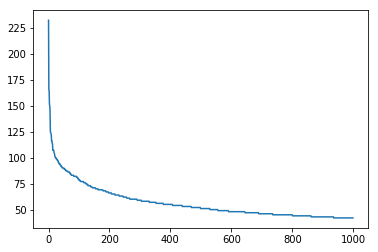

In [24]:
plt.plot(nb_pixels.sort_values(ascending=False).values[:1000])
plt.show()

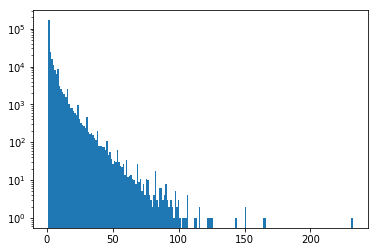

In [25]:
plt.hist(nb_pixels,bins=200,log=True)
plt.show()

## Local agreement measure

We define local agreement as the coefficient of 

In [26]:
grid = np.full([1001,1001],-1)
local_agreement = []

In [27]:
for (n,row) in enumerate(tqdm(df.itertuples())):
    x = row.x_coordinate
    y = row.y_coordinate
    grid[x][y] = row.color
    s = 0
    t = 0
    for i in range(-1,2):
        for j in range(-1,2):
            if (i==0 and j==0) or x+i<0 or x+i>1000 or y+j<0 or y+j>1000 or grid[x+i][y+j]==-1:
                continue
            t+=1    
            if grid[x+i][y+j]==row.color:
                s+=1
    if t != 0:
        s/=t
    local_agreement.append(s)

16559407it [11:36, 23790.16it/s]


In [28]:
df['local_agreement'] = local_agreement
df

,ts,user,x_coordinate,y_coordinate,color,pixel,local_agreement
13216722,1490918688000,2puPLvQ6X2zTSpfBkHXhxlIVo40=,505,510,1,511015,0.000
15577615,1490918728000,2puPLvQ6X2zTSpfBkHXhxlIVo40=,490,504,1,504994,0.000
5985698,1490918781000,2puPLvQ6X2zTSpfBkHXhxlIVo40=,518,498,0,499016,0.000
16342824,1490919337000,GP2B74SRyrZ3HIflSFoAzM+jS3U=,474,495,11,495969,0.000
5693574,1490919349000,GP2B74SRyrZ3HIflSFoAzM+jS3U=,477,495,11,495972,0.000
9251462,1490919361000,GP2B74SRyrZ3HIflSFoAzM+jS3U=,472,496,11,496968,0.000
2145079,1490919379000,GP2B74SRyrZ3HIflSFoAzM+jS3U=,473,497,11,497970,1.000
966759,1490919398000,GP2B74SRyrZ3HIflSFoAzM+jS3U=,474,498,11,498972,1.000
4497938,1490919410000,GP2B74SRyrZ3HIflSFoAzM+jS3U=,475,498,11,498973,1.000
13970911,1490919426000,GP2B74SRyrZ3HIflSFoAzM+jS3U=,476,498,11,498974,1.000


In [29]:
set(local_agreement)

{0,
 0.125,
 0.14285714285714285,
 0.16666666666666666,
 0.2,
 0.25,
 0.2857142857142857,
 0.3333333333333333,
 0.375,
 0.4,
 0.42857142857142855,
 0.5,
 0.5714285714285714,
 0.6,
 0.625,
 0.6666666666666666,
 0.7142857142857143,
 0.75,
 0.8,
 0.8333333333333334,
 0.8571428571428571,
 0.875,
 1.0}

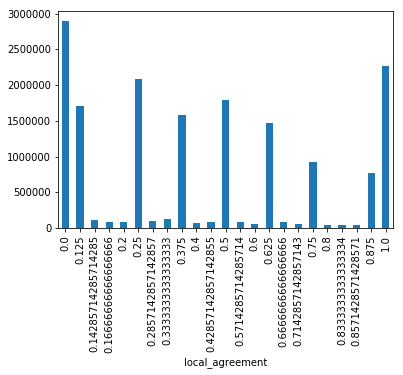

In [30]:
df.groupby("local_agreement").size().plot(kind="bar")

## Previous agreement measure

In [35]:
grid_agreement = np.full([1001,1001],-1)
grid_user = np.full([1001,1001], None, dtype=object)
previous_agreement = []
previous_user = []
nine_previous_user = []

In [36]:
for (n,row) in enumerate(tqdm(df.itertuples())):
    x = row.x_coordinate
    y = row.y_coordinate
    s = 0
    t = 0
    acc = []
    for i in range(-1,2):
        for j in range(-1,2):
            if x+i<0 or x+i>1000 or y+j<0 or y+j>1000 or grid_agreement[x+i][y+j]==-1:
                continue
            if grid_user[x+i][y+j]!=row.user:
                acc.append(grid_user[x+i][y+j])
            t+=1    
            s+=grid_agreement[x+i][y+j]
    if t != 0:
        s/=t
    previous_agreement.append(s)
    previous_user.append(grid_user[x][y])
    nine_previous_user.append(acc)
    grid_agreement[x][y] = row.local_agreement
    grid_user[x][y] = row.user

16559407it [21:34, 12791.54it/s]


In [37]:
df['previous_agreement'] = previous_agreement
df['previous_user'] = previous_user
df

,ts,user,x_coordinate,y_coordinate,color,pixel,local_agreement,previous_agreement,previous_user
13216722,1490918688000,2puPLvQ6X2zTSpfBkHXhxlIVo40=,505,510,1,511015,0.000,0.000000,None
15577615,1490918728000,2puPLvQ6X2zTSpfBkHXhxlIVo40=,490,504,1,504994,0.000,0.000000,None
5985698,1490918781000,2puPLvQ6X2zTSpfBkHXhxlIVo40=,518,498,0,499016,0.000,0.000000,None
16342824,1490919337000,GP2B74SRyrZ3HIflSFoAzM+jS3U=,474,495,11,495969,0.000,0.000000,None
5693574,1490919349000,GP2B74SRyrZ3HIflSFoAzM+jS3U=,477,495,11,495972,0.000,0.000000,None
9251462,1490919361000,GP2B74SRyrZ3HIflSFoAzM+jS3U=,472,496,11,496968,0.000,0.000000,None
2145079,1490919379000,GP2B74SRyrZ3HIflSFoAzM+jS3U=,473,497,11,497970,1.000,0.000000,None
966759,1490919398000,GP2B74SRyrZ3HIflSFoAzM+jS3U=,474,498,11,498972,1.000,1.000000,None
4497938,1490919410000,GP2B74SRyrZ3HIflSFoAzM+jS3U=,475,498,11,498973,1.000,1.000000,None
13970911,1490919426000,GP2B74SRyrZ3HIflSFoAzM+jS3U=,476,498,11,498974,1.000,1.000000,None


In [42]:
df.to_pickle("data/full_data.pkl")

In [38]:
set(previous_agreement)

{0,
 0.1111111111111111,
 0.125,
 0.14285714285714285,
 0.16666666666666666,
 0.2,
 0.2222222222222222,
 0.25,
 0.2857142857142857,
 0.3333333333333333,
 0.375,
 0.4,
 0.42857142857142855,
 0.4444444444444444,
 0.5,
 0.5555555555555556,
 0.5714285714285714,
 0.6,
 0.625,
 0.6666666666666666,
 0.7142857142857143,
 0.75,
 0.7777777777777778,
 0.8,
 0.8333333333333334,
 0.8571428571428571,
 0.875,
 0.8888888888888888,
 1.0}

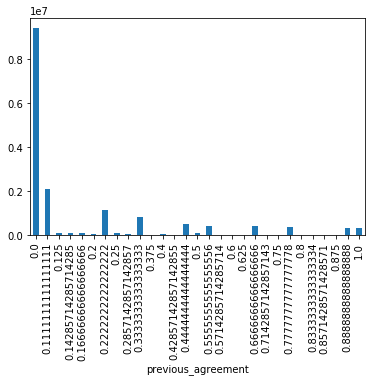

In [39]:
df.groupby("previous_agreement").size().plot(kind="bar")

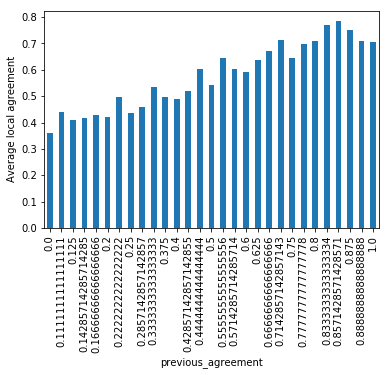

In [43]:
df.groupby("previous_agreement").local_agreement.mean().plot(kind='bar')
plt.ylabel("Average local agreement")
plt.savefig("previousXlocal_agreement_bars.png")

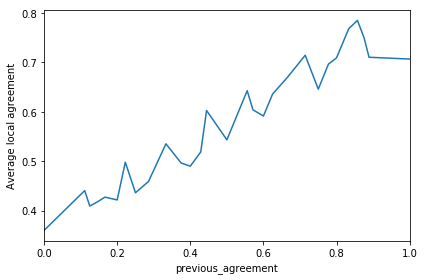

In [44]:
df.groupby("previous_agreement").local_agreement.mean().plot()
plt.ylabel("Average local agreement")
plt.tight_layout()
plt.savefig("figures/previousXlocal_agreement_line.pdf")

In [44]:
df['nine_previous_users'] = nine_previous_user
df

,ts,user,x_coordinate,y_coordinate,color,pixel,local_agreement,previous_agreement,previous_user,nine_previous_users
13216722,1490918688000,2puPLvQ6X2zTSpfBkHXhxlIVo40=,505,510,1,511015,0.000,0.000000,None,[]
15577615,1490918728000,2puPLvQ6X2zTSpfBkHXhxlIVo40=,490,504,1,504994,0.000,0.000000,None,[]
5985698,1490918781000,2puPLvQ6X2zTSpfBkHXhxlIVo40=,518,498,0,499016,0.000,0.000000,None,[]
16342824,1490919337000,GP2B74SRyrZ3HIflSFoAzM+jS3U=,474,495,11,495969,0.000,0.000000,None,[]
5693574,1490919349000,GP2B74SRyrZ3HIflSFoAzM+jS3U=,477,495,11,495972,0.000,0.000000,None,[]
9251462,1490919361000,GP2B74SRyrZ3HIflSFoAzM+jS3U=,472,496,11,496968,0.000,0.000000,None,[]
2145079,1490919379000,GP2B74SRyrZ3HIflSFoAzM+jS3U=,473,497,11,497970,1.000,0.000000,None,[GP2B74SRyrZ3HIflSFoAzM+jS3U=]
966759,1490919398000,GP2B74SRyrZ3HIflSFoAzM+jS3U=,474,498,11,498972,1.000,1.000000,None,[GP2B74SRyrZ3HIflSFoAzM+jS3U=]
4497938,1490919410000,GP2B74SRyrZ3HIflSFoAzM+jS3U=,475,498,11,498973,1.000,1.000000,None,[GP2B74SRyrZ3HIflSFoAzM+jS3U=]
13970911,1490919426000,GP2B74SRyrZ3HIflSFoAzM+jS3U=,476,498,11,498974,1.000,1.000000,None,[GP2B74SRyrZ3HIflSFoAzM+jS3U=]


In [45]:
df.nine_previous_users.to_pickle('data/previous_users_list.pkl')

# User features

In [10]:
user_features = df.groupby("user").local_agreement.mean().to_frame(name="avg_local")
user_features

,avg_local
user,
+++/DjiwyzTQzfai1RGavwwdeF0=,0.778659
+++9hvbU1X//SlejJp59KbSRc1A=,1.000000
+++oRgWqj1lB5TeiH4L9knAO22c=,0.357143
+++puVCRnLGcHlnCeZ4SQbDsuTY=,0.585938
+++qNQn+KYTeVhJksRjO3UOtuFQ=,0.375000
++/9E7wvd9z2dmTPdzL1lfCxo4A=,0.000000
++/EZo8X5/iofnK7mr2VhpFR8S4=,0.000000
++/KGWlqH96wS48Q/DQibZ1v89w=,0.750000
++/bKLDeIz4ocCIk7UAFZvG5GBQ=,0.250000


### Average number of collaborators

In [5]:
tqdm.pandas(desc='user collab')
user_collab_set = df.groupby('user').nine_previous_users.progress_apply(lambda pu : set(chain.from_iterable(pu.values)))

100%|██████████| 1166924/1166924 [12:33<00:00, 1549.42it/s]


In [63]:
user_collab_set

user
+++/DjiwyzTQzfai1RGavwwdeF0=    {bej6rmProiJkQi1Eeu+UiCUat/I=, ek+PYCV33WllGUU...
+++9hvbU1X//SlejJp59KbSRc1A=                       {RLcJ3SL+kEf4tXytd5dux4ptuy0=}
+++oRgWqj1lB5TeiH4L9knAO22c=    {u5NLR4yeCsI/yg+Jv8Puy9VDPO0=, NySFOaVWjcvw8or...
+++puVCRnLGcHlnCeZ4SQbDsuTY=    {UgR40rEejv6YUILQ9gJVz82TPYE=, GOqos3v64/Tzj++...
+++qNQn+KYTeVhJksRjO3UOtuFQ=    {ZTls3P59HjGCQurRwyQqN741rlQ=, k8kuiRbNsi5iaHY...
++/9E7wvd9z2dmTPdzL1lfCxo4A=    {OzR8gmpZPEYXkuSeAWu86E+AklA=, gwXdmhnJxQnH2yX...
++/EZo8X5/iofnK7mr2VhpFR8S4=    {i05IoGpHoVtti3wnp5AR7U6+jRE=, YGozOZGbIeKe3mc...
++/KGWlqH96wS48Q/DQibZ1v89w=    {wtdhz3ytYPoEcq8Y8bNbyJXSUDc=, H5w4iKFmJa8N1Zx...
++/bKLDeIz4ocCIk7UAFZvG5GBQ=    {8V1ItQ1o9YhXapCqUHbjH3yOe44=, JHPg3HkewXwdZuI...
++/kXquvnG11CSClr5IVpPftjxg=    {MYnZ1UGZ2y/nARWogJqVcn8I0QA=, /wJ/xvidi0xR4kO...
++/qlDNL7l4aenV/jBZnWrDz5vQ=    {DSKYPcRkr1yrBAQs7BGk3eCPEx0=, 7dNYsI7TBv71qyp...
++/rK5dJpOkIsiCHJipB9VBlO4Y=                       {jusLJ9UJIeG1r6NKNVHjf0e+m3o=}
++/v9ULXzTT

In [64]:
user_collab_set.to_pickle("data/user_collab_set.pkl")

In [65]:
user_features["avg_nb_collab"] = user_collab_set.apply(len)/df.groupby("user").size()

### Median distance between clicks

In [16]:
def rolling_median_distance(x_and_y):
    if x_and_y.shape[0]==1:
        return 0
    return np.nanmedian(np.sqrt(np.square(x_and_y.diff()).sum(axis=1)))

In [17]:
tqdm.pandas(desc='median')
user_median_distance = df.groupby('user')[["x_coordinate","y_coordinate"]].progress_apply(rolling_median_distance)

median: 100%|██████████| 1166924/1166924 [08:43<00:00, 2227.61it/s]


In [18]:
user_median_distance

user
+++/DjiwyzTQzfai1RGavwwdeF0=     34.576885
+++9hvbU1X//SlejJp59KbSRc1A=      0.000000
+++oRgWqj1lB5TeiH4L9knAO22c=     47.707442
+++puVCRnLGcHlnCeZ4SQbDsuTY=     13.038405
+++qNQn+KYTeVhJksRjO3UOtuFQ=    217.552456
++/9E7wvd9z2dmTPdzL1lfCxo4A=      0.000000
++/EZo8X5/iofnK7mr2VhpFR8S4=      0.000000
++/KGWlqH96wS48Q/DQibZ1v89w=    262.219685
++/bKLDeIz4ocCIk7UAFZvG5GBQ=    318.904374
++/kXquvnG11CSClr5IVpPftjxg=      0.000000
++/qlDNL7l4aenV/jBZnWrDz5vQ=      0.000000
++/rK5dJpOkIsiCHJipB9VBlO4Y=      0.000000
++/v9ULXzTTllkiW/GdCjqOWPQ8=     11.000000
++0FM8OVDxYVKSyl9Nm042ZhdA8=    682.011730
++0O4GYL01Li1GdeQoWeS1wAJ+c=      0.000000
++0SShpw69HU5Y/ctO3E4iT5OOw=      0.000000
++0UhE5w/vPK6vDg53K1qLr4ToU=      0.000000
++0WCHV6QxWGqC1SwooefQyiQK0=    176.663522
++0d4bTjQMJotW4FTf98jgHtQvA=      0.000000
++0mFQTQNb1BGb8mmsLGfMd4xCE=      0.000000
++0wkYnJ2Saoxiu6CA5RQd0CxXo=    483.558683
++1RMYbjCkEybO4GUO90so3S0U4=    167.015547
++1WlvnvME+1NC0aFTc/JjY6oE8=     10.440307
++1yF6

In [22]:
print((user_median_distance==0).sum() - (df.user.value_counts()==1).sum(), "users clicked on the same spot multiple times.")

2160 users clicked on the same spot multiple times.


In [23]:
user_features['median_distance'] = user_median_distance

### Average time between clicks

In [24]:
ts_by_user = df.groupby('user').ts
avg_time_between = (ts_by_user.nth(-1)-ts_by_user.nth(0))/ts_by_user.size()

In [25]:
# sanity check : there exists 0 cases where the average time between clicks is 0 but there is more than 1 click
((avg_time_between==0) & (ts_by_user.size() > 1)).sum()

0

In [26]:
user_features["avg_time_between"] = avg_time_between

### Number of clicks per user

In [27]:
user_features['nb_clicks'] = df.groupby('user').size()

In [66]:
user_features

,avg_local,avg_nb_collab,median_distance,avg_time_between,nb_clicks,median_distance_category,time_category
user,,,,,,,
+++/DjiwyzTQzfai1RGavwwdeF0=,0.778659,7.512195,34.576885,5.997537e+06,41,2,4
+++9hvbU1X//SlejJp59KbSRc1A=,1.000000,1.000000,0.000000,0.000000e+00,1,0,0
+++oRgWqj1lB5TeiH4L9knAO22c=,0.357143,8.000000,47.707442,7.917417e+06,12,3,6
+++puVCRnLGcHlnCeZ4SQbDsuTY=,0.585938,7.625000,13.038405,8.486875e+05,16,0,0
+++qNQn+KYTeVhJksRjO3UOtuFQ=,0.375000,9.000000,217.552456,6.331100e+07,3,15,48
++/9E7wvd9z2dmTPdzL1lfCxo4A=,0.000000,8.000000,0.000000,0.000000e+00,1,0,0
++/EZo8X5/iofnK7mr2VhpFR8S4=,0.000000,9.000000,0.000000,0.000000e+00,1,0,0
++/KGWlqH96wS48Q/DQibZ1v89w=,0.750000,8.333333,262.219685,6.017367e+07,3,18,46
++/bKLDeIz4ocCIk7UAFZvG5GBQ=,0.250000,4.500000,318.904374,8.602450e+07,2,22,66


In [67]:
user_features.describe()

,avg_local,avg_nb_collab,median_distance,avg_time_between,nb_clicks,median_distance_category,time_category
count,1.166924e+06,1.166924e+06,1.166924e+06,1.166924e+06,1.166924e+06,1.166924e+06,1.166924e+06
mean,3.700375e-01,6.930563e+00,1.540980e+02,9.532313e+06,1.419065e+01,1.058564e+01,7.046659e+00
std,2.834999e-01,2.190434e+00,2.389276e+02,1.697162e+07,2.992983e+01,1.679898e+01,1.301365e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,1.250000e-01,6.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
50%,3.750000e-01,7.636364e+00,1.531057e+01,1.886000e+06,3.000000e+00,1.000000e+00,1.000000e+00
75%,5.535714e-01,8.666667e+00,2.648251e+02,1.117324e+07,1.300000e+01,1.800000e+01,8.000000e+00
max,1.000000e+00,9.000000e+00,1.412799e+03,1.294365e+08,6.560000e+02,9.900000e+01,9.900000e+01


In [68]:
user_features.to_pickle("data/user_features.pkl")

## Relation between features and local agreement

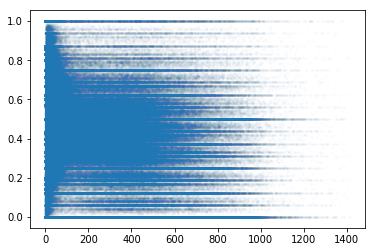

In [5]:
plt.scatter(user_features.median_distance, user_features.avg_local, s=3, alpha = 0.01)

In [33]:
user_features["median_distance_category"]=pd.cut(user_features['median_distance'], bins=100, labels=False)

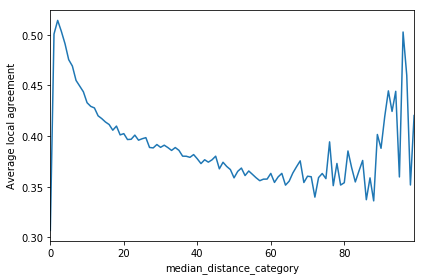

In [42]:
user_features.groupby("median_distance_category").avg_local.mean().plot()
plt.ylabel("Average local agreement")
plt.tight_layout()
plt.savefig("figures/median_distanceXlocal_agreement.pdf")

In [35]:
user_features["time_category"]=pd.cut(user_features['avg_time_between'], bins=100, labels=False)

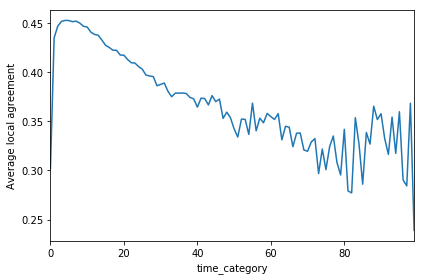

In [43]:
user_features.groupby("time_category").avg_local.mean().plot()
plt.ylabel("Average local agreement")
plt.tight_layout()
plt.savefig("figures/avg_timeXlocal_agreement.pdf")

In [15]:
user_features["collab_category"]=pd.cut(user_features['avg_nb_collab'], bins=100, labels=False)

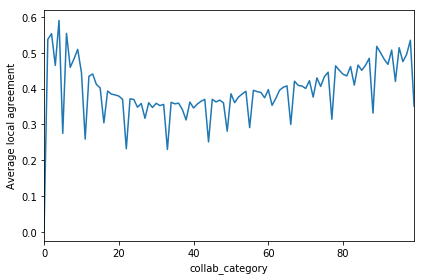

In [16]:
user_features.groupby("collab_category").avg_local.mean().plot()
plt.ylabel("Average local agreement")
plt.tight_layout()
plt.savefig("figures/avg_nb_collabXlocal_agreement.pdf")